In [2]:
from google.colab import drive
drive.mount('/content/mount')

Mounted at /content/mount


In [3]:
import cv2,os
import numpy as np

In [4]:
data_path=r'/content/mount/MyDrive/AI & Machine Learning/Deep Learning/Cat & Dog Classification/PetImages'

categories=os.listdir(data_path)


labels=np.arange(len(categories))


label_dict=dict(zip(categories,labels))

print(label_dict)
print(categories)
print(labels)

{'Dog': 0, 'Cat': 1}
['Dog', 'Cat']
[0 1]


In [5]:
img_size=50

data=[]
target=[]

for category in categories:

  folder_path=os.path.join(data_path,category)
  print(folder_path)
  img_names=os.listdir(folder_path)

  for img_name in img_names:
    img_path=os.path.join(folder_path,img_name)
    #print(img_path)

    try:
        img=cv2.imread(img_path)
        #cv2.imshow('LIVE',img)
        #cv2.waitkey(500)
        gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        resized=cv2.resize(gray,(img_size,img_size))


        data.append(resized)
        target.append(label_dict[category])

    except Exception as e:
        print(img_path,e)



/content/mount/MyDrive/AI & Machine Learning/Deep Learning/Cat & Dog Classification/PetImages/Dog
/content/mount/MyDrive/AI & Machine Learning/Deep Learning/Cat & Dog Classification/PetImages/Dog/9188.jpg OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

/content/mount/MyDrive/AI & Machine Learning/Deep Learning/Cat & Dog Classification/PetImages/Dog/Thumbs.db OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

/content/mount/MyDrive/AI & Machine Learning/Deep Learning/Cat & Dog Classification/PetImages/Dog/8730.jpg OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

/content/mount/MyDrive/AI & Machine Learning/Deep Learning/Cat & Dog Classification/PetImages/Dog/7369.jpg OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion fai

##convert Data & Targets to the numpy array

In [17]:
data=np.array(data)
target=np.array(target)

In [18]:
print(data.shape,target.shape)

(25000, 50, 50) (25000,)


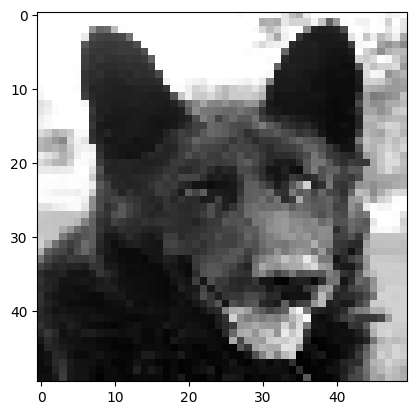

In [19]:
from matplotlib import pyplot as plt
plt.imshow(data[100],cmap='gray')

### Data and target preprocessing

The above code segment perform some necessary proprocessing task for data and target

1.```data=np.array(data)/255.0``` - Dividing all the pixels in all the images by 255 in order to convert them to the range 0-1.
This is to reduce the complexity in training the Neural Network.

2.```data=np.reshape(data,(data.shape[0],img_size,img_size,1))``` -
The CNNs require 4 dimensional input, therefore we add the  dimension 1,
this is to represent grayscale image, for color images you may have to use 3.

In [21]:
data_new=data/255.0 #image normalizing krnwa.
#pixel value 0-255 athra tyna nisa 255n bednwa. 0 and 1 athrata enwa.
#neural netowrk ekt normalize krla danna oni nisa.
#ehm nathnm loss eka godak wedi
data_new=data_new.reshape(data_new.shape[0],data_new.shape[1],data_new.shape[1],1)
print(data_new.shape)
#2d cnn design krla tynne color images walata.api gray yawanakota 1 manually dala yawanna oni.
#1n kynne api eka chenel ekk tyna image ewanwa

(25000, 50, 50, 1)


## Categorical encording

In [22]:
'''from keras.utils import np_utils
target_new = np_utils.to_categorical(target)'''

'from keras.utils import np_utils\ntarget_new = np_utils.to_categorical(target)'

In [1]:
'''from keras.utils import to_categorical

# Assuming 'target' is your integer-encoded categorical variable
target_new = to_categorical(target)'''


NameError: name 'target' is not defined

In [23]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(categories='auto')
onehot_encoder.fit(target.reshape(-1, 1))
target_new = onehot_encoder.transform(target.reshape(-1, 1))

In [24]:
%cd '/content/mount/MyDrive/AI & Machine Learning/Deep Learning/Cat & Dog Classification/Dataset'

/content/mount/MyDrive/AI & Machine Learning/Deep Learning/Cat & Dog Classification/Dataset


In [25]:
np.save('data',data_new)
np.save('target',target_new)

In [14]:
data_new.shape

(25000, 50, 50, 1)

In [26]:
target_new.shape

(25000, 2)

In [1]:
print(data_new)

NameError: name 'data_new' is not defined